In [1]:
import sys 
sys.path.append('./')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from unified_model.mechanical_system.mechanical_system import MechanicalSystem
from unified_model.mechanical_system.model import ode_decoupled
from unified_model.mechanical_system.damper.damper import Damper
from unified_model.mechanical_system.input_excitation.footstep import Footstep
from unified_model.mechanical_system.spring.magnetic_spring import MagneticSpring
from unified_model.mechanical_system.magnet_assembly.magnet_assembly import MagnetAssembly

from better_graphs.better_graphs import better_graphs
from better_graphs.better_graphs.defaults import set_pretty_defaults

In [3]:
spring_coulomb = MagneticSpring(fea_data_file='./unified_model/mechanical_system/spring/data/10x10alt.csv', model='coulombs_unmodified')
spring_coulomb_modified = MagneticSpring(fea_data_file='./unified_model/mechanical_system/spring/data/10x10alt.csv', model='coulombs_modified')
spring_power_series = MagneticSpring(fea_data_file='./unified_model/mechanical_system/spring/data/10x10alt.csv', model='power_series_3')

In [5]:
print('m: {}'.format(np.sqrt(spring_coulomb.model_parameters)))

m: [4.11864344]


In [6]:
spring_power_series.model_parameters

array([ 1.70932958e+01, -1.71283844e+03,  5.08189693e+04, -4.59402959e+05])

In [17]:
g, numerator = spring_coulomb_modified.model_parameters


u0 = 4 * np.pi * 10e-7
print('m: {}'.format(np.sqrt(numerator/u0)))
print('g: {:.3E}'.format(g))

m: 15.302715705561575
g: 1.125E-04


In [15]:
u0 = 4*np.pi*10e-7
m = 4.11864344

def custom(z, G):
    return u0*m*m/(4*np.pi*z*z+G)

spring_coulomb_modified.model = custom
spring_coulomb_modified._fit_model_parameters()
spring_coulomb_modified.model_parameters

array([-3.93401471e-06])

Need to plot the following:
 - FEA
 - Coulomb's Law
 - Coulomb's Law (modified)
 - Power series (degree = 3)

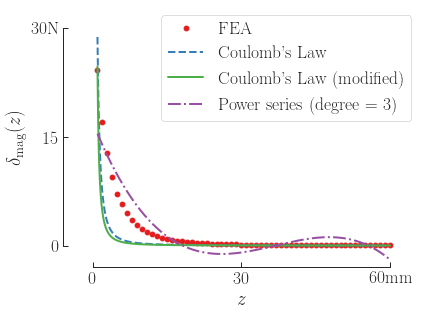

In [16]:
df = spring_coulomb.fea_dataframe
z = df['z']
z_arr = np.linspace(min(z), max(z), 1000)
force = df['force']


set_pretty_defaults(tex_font = 'CMU Serif')

force_coulomb = spring_coulomb.get_force_array(z_arr)
force_coulomb_mod = spring_coulomb_modified.get_force_array(z_arr)
force_power_series = spring_power_series.get_force_array(z_arr)

plt.figure(figsize=(6.4, 4.8))
plt.plot(z, force, 'o', label='FEA')
plt.plot(z_arr, force_coulomb, '--', label='Coulomb\'s Law')
plt.plot(z_arr, force_coulomb_mod, label='Coulomb\'s Law (modified)')
plt.plot(z_arr, force_power_series, '-.', label='Power series (degree = 3)')

ax = plt.gca()
x_new_ticks = {0:0, 0.03:'30', 0.06:'60mm'}
y_new_ticks = {0:0, 15:15, 30:'30N'}
better_graphs.make_better_graph(ax, x_new_ticks=x_new_ticks, y_new_ticks=y_new_ticks, only_new_ticks='xy')

plt.xlabel('$z$')
plt.ylabel('$\delta_{\mathrm{mag}}(z)$')

plt.legend()

plt.savefig('magSpringCombined.pdf', dpi=300, bbox_inches='tight')

In [4]:
spring_coulomb_modified.model_parameters

array([0.00011246, 0.00294271])

In [4]:
magnet_assembly = MagnetAssembly(n_magnet=2,
                                h_magnet=10,
                                h_spacer=5,
                                dia_magnet=10,
                                dia_spacer=10)

In [5]:
damper = Damper(model='constant', model_kwargs={'damping_coefficient': 0.1})

In [6]:
acc_up = 1.5*9.81
acc_dec = -1*9.81
acc_down = -2*9.81
acc_impact = 2*9.81

human_footstep = Footstep(accelerations=[acc_up, acc_dec, acc_down, acc_impact],
                   t_couple_separation=0.05,
                   positive_footstep_displacement=0.15,
                   t_footstep_start=1)


In [7]:
system = MechanicalSystem()
system.set_spring(spring_coulomb_modified )
system.set_damper(damper)
system.set_input(human_footstep)
system.set_magnet_assembly(magnet_assembly)

In [8]:
t = np.arange(0, 5, 0.001)

system.set_model('ode_decoupled', initial_conditions=[0, 0, 0.1, 0])
system.solve(t_array=t)

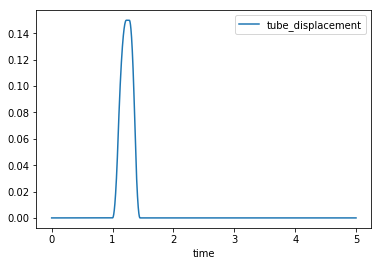

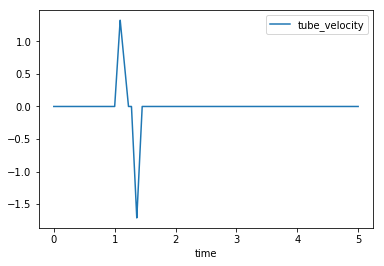

In [9]:
system.get_output().plot(x='time', y='tube_displacement')
system.get_output().plot(x='time', y='tube_velocity')

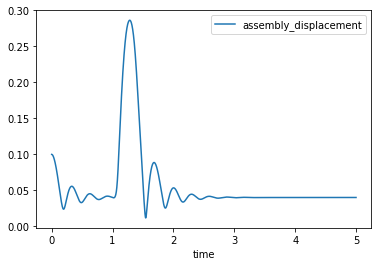

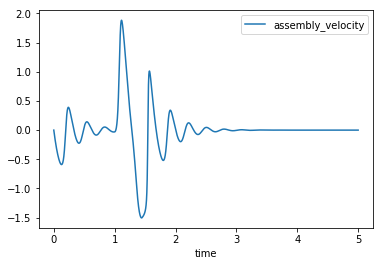

In [10]:
system.get_output().plot(x='time', y='assembly_displacement')
system.get_output().plot(x='time', y='assembly_velocity')

In [13]:
output = system.get_output()

In [14]:
output['assembly_displacement']

0       0.100000
1       0.099996
2       0.099984
3       0.099963
4       0.099935
5       0.099898
6       0.099854
7       0.099802
8       0.099742
9       0.099674
10      0.099598
11      0.099515
12      0.099424
13      0.099326
14      0.099220
15      0.099106
16      0.098985
17      0.098857
18      0.098722
19      0.098579
20      0.098429
21      0.098272
22      0.098108
23      0.097937
24      0.097759
25      0.097574
26      0.097382
27      0.097184
28      0.096978
29      0.096766
          ...   
4970    0.040151
4971    0.040151
4972    0.040151
4973    0.040151
4974    0.040150
4975    0.040150
4976    0.040150
4977    0.040150
4978    0.040150
4979    0.040150
4980    0.040150
4981    0.040150
4982    0.040150
4983    0.040150
4984    0.040150
4985    0.040150
4986    0.040150
4987    0.040150
4988    0.040150
4989    0.040150
4990    0.040150
4991    0.040150
4992    0.040150
4993    0.040150
4994    0.040150
4995    0.040150
4996    0.040150
4997    0.0401